# Kaggle Imports
---
Uncomment and run those cells if you're working on Cloud and you need to import the dataset!

- Use this on Colab to import your api json
  

In [265]:
'''
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
'''

mv: cannot stat 'kaggle.json': No such file or directory


- Install Kaggle and import then unzip dataset

In [1]:
'''
!pip install pandas
!pip install kaggle
!pip install googletrans==3.1.0a0
!kaggle datasets download -d najzeko/steam-reviews-2021
!unzip steam-reviews-2021.zip
'''

^C
^C


In [2]:
''' bonus imports 
!wget https://sapienza2021adm.s3.eu-south-1.amazonaws.com/steam_reviews_bonus_1.zip
'''


' bonus imports \n!wget https://sapienza2021adm.s3.eu-south-1.amazonaws.com/steam_reviews_bonus_1.zip\n'

  # Libraries and Functions imports

In [2]:
import pandas as pd
import numpy as np        
from datetime import datetime
import matplotlib.pyplot as plt
from googletrans import Translator

In [3]:
# read the main csv and parse it in a pandas dataframe 
dataframe = pd.read_csv('./steam_reviews.csv')
print(dataframe.columns)

Index(['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')


# Bonus dataset imports

### Here we import the bonus dataset and append it to the main one.
*to facilitate the reading we will refer to the bonus dataset as "bonus" and to the main dataset as "main".*   
In order to do so, some steps are required:
- *Import* the bonuses and merge them together
- *Check* if bonus and main have the same columns
- *Rearrange* bonus columns to equal main's
- *Check* the dtypes of bonus and main columns to find differences
- *Parse* bonus columns in the relative correct dtype

In [4]:
df_extensions_joined = pd.read_csv('./steam_reviews_bonus_1.csv').append(pd.read_csv('./steam_reviews_bonus_2.csv'))

C:\Users\Valentino\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,8,9,10,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
# rearrange df columns
cols = list(df_extensions_joined.columns.values)
print(cols)
main_cols = list(dataframe.columns.values)
print(main_cols)

['Unnamed: 0', 'Unnamed: 0.1', 'app_id', 'app_name', 'review_id', 'language', 'review', 'timestamp_created', 'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count', 'steam_purchase', 'received_for_free', 'written_during_early_access', 'author.steamid', 'author.num_games_owned', 'author.num_reviews', 'author.playtime_forever', 'author.playtime_last_two_weeks', 'author.playtime_at_review', 'author.last_played']
['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review', 'timestamp_created', 'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count', 'steam_purchase', 'received_for_free', 'written_during_early_access', 'author.steamid', 'author.num_games_owned', 'author.num_reviews', 'author.playtime_forever', 'author.playtime_last_two_weeks', 'author.playtime_at_review', 'author.last_played']


In [6]:
cols = cols[:1] + cols[2:]
df_extensions_joined = df_extensions_joined[cols]

In [7]:
print(cols == list(dataframe.columns.values))

True


In [8]:
print(dataframe.dtypes == df_extensions_joined.dtypes)

Unnamed: 0                        False
app_id                            False
app_name                           True
review_id                          True
language                           True
review                             True
timestamp_created                 False
timestamp_updated                 False
recommended                       False
votes_helpful                     False
votes_funny                       False
weighted_vote_score                True
comment_count                     False
steam_purchase                    False
received_for_free                 False
written_during_early_access       False
author.steamid                    False
author.num_games_owned            False
author.num_reviews                False
author.playtime_forever            True
author.playtime_last_two_weeks     True
author.playtime_at_review          True
author.last_played                 True
dtype: bool


In [9]:
print(dataframe.dtypes)
print(df_extensions_joined.dtypes)

Unnamed: 0                          int64
app_id                              int64
app_name                           object
review_id                           int64
language                           object
review                             object
timestamp_created                   int64
timestamp_updated                   int64
recommended                          bool
votes_helpful                       int64
votes_funny                         int64
weighted_vote_score               float64
comment_count                       int64
steam_purchase                       bool
received_for_free                    bool
written_during_early_access          bool
author.steamid                      int64
author.num_games_owned              int64
author.num_reviews                  int64
author.playtime_forever           float64
author.playtime_last_two_weeks    float64
author.playtime_at_review         float64
author.last_played                float64
dtype: object
Unnamed: 0          

In [10]:
# Converting all "Object" columns into int64
# unnamed
df_extensions_joined['Unnamed: 0'] = pd.to_numeric(df_extensions_joined['Unnamed: 0'], errors='coerce')
df_extensions_joined['Unnamed: 0'] = df_extensions_joined['Unnamed: 0'].fillna(0).astype(np.dtype('int64'))
# timestamp_created
df_extensions_joined['timestamp_created'] = pd.to_numeric(df_extensions_joined['timestamp_created'], errors='coerce')
df_extensions_joined['timestamp_created'] = df_extensions_joined['timestamp_created'].fillna(0).astype(np.dtype('int64'))
# timestamp_updated
df_extensions_joined['timestamp_updated'] = pd.to_numeric(df_extensions_joined['timestamp_updated'], errors='coerce')
df_extensions_joined['timestamp_updated'] = df_extensions_joined['timestamp_updated'].fillna(0).astype(np.dtype('int64'))
# votes_helpful
df_extensions_joined['votes_helpful'] = pd.to_numeric(df_extensions_joined['votes_helpful'], errors='coerce')
df_extensions_joined['votes_helpful'] = df_extensions_joined['votes_helpful'].fillna(0).astype(np.dtype('int64'))
# votes_funny
df_extensions_joined['votes_funny'] = pd.to_numeric(df_extensions_joined['votes_funny'], errors='coerce')
df_extensions_joined['votes_funny'] = df_extensions_joined['votes_funny'].fillna(0).astype(np.dtype('int64'))

# Converting floats into int64
# app_id
df_extensions_joined['app_id'] = df_extensions_joined['app_id'].fillna(0).astype(np.dtype('int64'))
# comment_count
df_extensions_joined['comment_count'] = df_extensions_joined['comment_count'].fillna(0).astype(np.dtype('int64'))
# author.steamid
df_extensions_joined['author.steamid'] = df_extensions_joined['author.steamid'].fillna(0).astype(np.dtype('int64'))
# author.num_games_owned
df_extensions_joined['author.num_games_owned'] = df_extensions_joined['author.num_games_owned'].fillna(0).astype(np.dtype('int64'))
# author.num_reviews
df_extensions_joined['author.num_reviews'] = df_extensions_joined['author.num_reviews'].fillna(0).astype(np.dtype('int64'))

# Converting object into bool
# recommended
df_extensions_joined['recommended'] = df_extensions_joined['recommended'].apply(str).str.replace(' ', '')
df_extensions_joined['recommended'] = df_extensions_joined['recommended'].apply(bool)
# received_for_free
df_extensions_joined['received_for_free'] = df_extensions_joined['received_for_free'].apply(str).str.replace(' ', '')
df_extensions_joined['received_for_free'] = df_extensions_joined['received_for_free'].apply(bool)
# written_during_early_access
df_extensions_joined['written_during_early_access'] = df_extensions_joined['written_during_early_access'].apply(str).str.replace(' ', '')
df_extensions_joined['written_during_early_access'] = df_extensions_joined['written_during_early_access'].apply(bool)
# steam_purchase
df_extensions_joined['steam_purchase'] = df_extensions_joined['steam_purchase'].apply(str).str.replace(' ', '')
df_extensions_joined['steam_purchase'] = df_extensions_joined['steam_purchase'].apply(bool)

In [11]:
print(dataframe.dtypes == df_extensions_joined.dtypes)

Unnamed: 0                        True
app_id                            True
app_name                          True
review_id                         True
language                          True
review                            True
timestamp_created                 True
timestamp_updated                 True
recommended                       True
votes_helpful                     True
votes_funny                       True
weighted_vote_score               True
comment_count                     True
steam_purchase                    True
received_for_free                 True
written_during_early_access       True
author.steamid                    True
author.num_games_owned            True
author.num_reviews                True
author.playtime_forever           True
author.playtime_last_two_weeks    True
author.playtime_at_review         True
author.last_played                True
dtype: bool


In [ ]:
print(df_extensions_joined['app_name'])

In [ ]:
# df_extensions_joined.to_csv('hw2_bonus_dataset.csv')

In [13]:
dataframe = dataframe.append(df_extensions_joined)

# [RQ1]

In [14]:
print(dataframe.shape)


(38747379, 23)


In this dataset we have Nrows and 23 variables.

In [15]:
dataframe.head(3)

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09


In [16]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38747379 entries, 0 to 7000003
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned    

<Figure size 432x288 with 0 Axes>

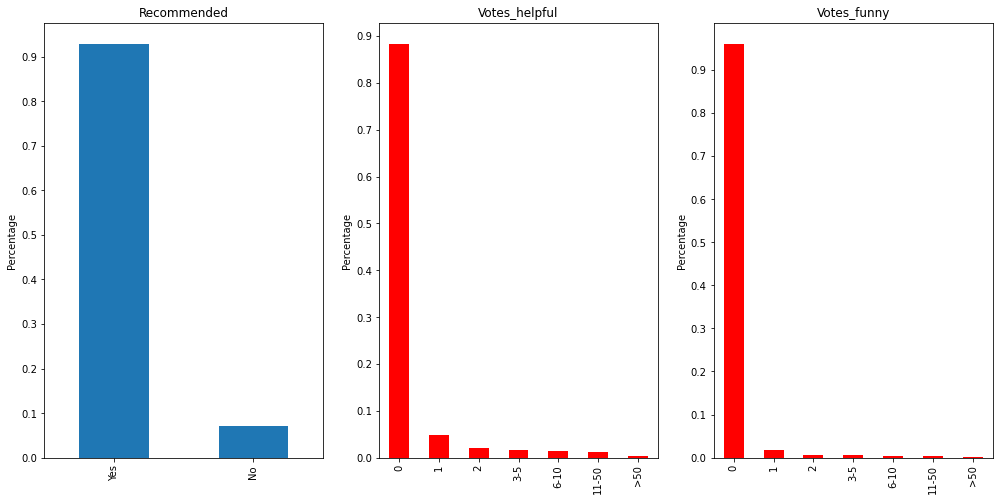

In [17]:
recomm_amount = dataframe["recommended"].value_counts()
recomm_amount = recomm_amount/sum(recomm_amount)
#print(recomm_amount)

helpful=dataframe["votes_helpful"].value_counts()
my_bins=[0,1,2,3,5,10,50,max(helpful)]
out=pd.cut(dataframe["votes_helpful"],bins=my_bins,include_lowest=True)
ax=out.value_counts(sort=False)
ax=ax/sum(ax)
#print(ax)

funny=dataframe["votes_funny"].value_counts()
my_bins=[0,1,2,3,5,10,50,max(funny)]
out2=pd.cut(dataframe["votes_funny"],bins=my_bins,include_lowest=True)
bx=out2.value_counts(sort=False)
bx=bx/sum(bx)
#print(bx)



plt.figure()
fig=plt.figure(figsize=(17,8))
plt.subplot(131)
recomm_amount.plot.bar(
    title='Recommended',
ylabel='Percentage',)
plt.yticks(np.arange(0,1,0.1))
plt.xticks([0,1],['Yes','No'])

plt.subplot(132)
ax.plot.bar(color='r',title="Votes_helpful",ylabel='Percentage')
plt.xticks([0,1,2,3,4,5,6],['0','1','2','3-5','6-10','11-50','>50'])
plt.yticks(np.arange(0,1,0.1))

plt.subplot(133)
bx.plot.bar(color='r',title="Votes_funny",ylabel='Percentage')
plt.xticks([0,1,2,3,4,5,6],['0','1','2','3-5','6-10','11-50','>50'])
plt.yticks(np.arange(0,1,0.1))

plt.show()

<Figure size 432x288 with 0 Axes>

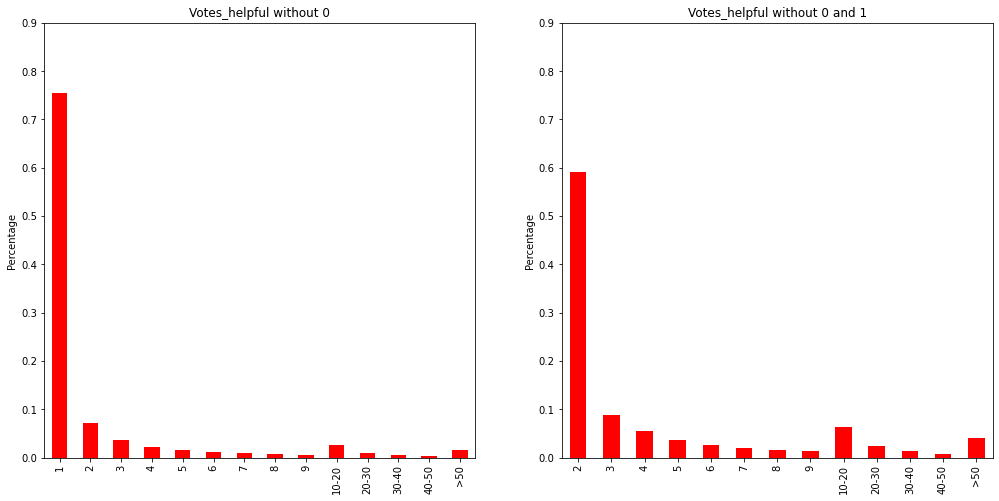

In [18]:
##TEST!
##Analyzing the comments without 0 helpful vote and without 0 and 1, the most commons
helpful2=dataframe[dataframe.votes_helpful>0]["votes_helpful"]
my_bins=[1,2,3,4,5,6,7,8,9,10,20,30,40,50,max(helpful2)]
out=pd.cut(helpful2,bins=my_bins,include_lowest=True)
ax=out.value_counts(sort=False)
ax=ax/sum(ax)
#print(ax)


plt.figure()
fig=plt.figure(figsize=(17,8))
plt.subplot(121)
ax.plot.bar(color='r',title="Votes_helpful without 0",ylabel='Percentage')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],['1','2','3','4','5','6','7','8','9','10-20','20-30','30-40','40-50','>50'])
plt.yticks(np.arange(0,1,0.1))


helpful3=dataframe[dataframe.votes_helpful>1]["votes_helpful"]
my_bins=[2,3,4,5,6,7,8,9,10,20,30,40,50,max(helpful2)]
out2=pd.cut(helpful2,bins=my_bins,include_lowest=True)
bx=out2.value_counts(sort=False)
bx=bx/sum(bx)
#print(bx)

plt.subplot(122)
bx.plot.bar(color='r',title="Votes_helpful without 0 and 1",ylabel='Percentage')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12],['2','3','4','5','6','7','8','9','10-20','20-30','30-40','40-50','>50'])
plt.yticks(np.arange(0,1,0.1))


plt.show()

In [19]:
weighted=dataframe["weighted_vote_score"]
plt.figure()
fig=plt.figure(figsize=(5,6))

#weighted.plot(kind='box')

<Figure size 432x288 with 0 Axes>

<Figure size 360x432 with 0 Axes>

In [20]:
dataframe.corr()

,Unnamed: 0,app_id,review_id,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
Unnamed: 0,1.000000,0.036798,-0.012633,0.383409,0.385211,-0.217597,-7.677752e-05,-6.109873e-04,0.038164,0.008257,-0.222809,-0.517323,-0.481744,6.013849e-04,-5.772972e-05,-1.358068e-04,0.013723,-0.002680,0.008291,0.417729
app_id,0.036798,1.000000,0.149217,0.015574,0.014039,-0.023452,1.665147e-05,9.158524e-01,0.225216,0.002288,0.000686,0.008245,0.027019,-6.476841e-01,5.802280e-05,-7.557357e-05,-0.081313,-0.007156,-0.077094,0.009923
review_id,-0.012633,0.149217,1.000000,0.160182,0.150495,0.055010,-8.663271e-05,-1.131179e-03,-0.211004,-0.025104,0.055732,0.014968,-0.025413,5.350830e-04,-2.018180e-05,9.842860e-05,-0.072623,0.131542,0.009128,0.062593
timestamp_created,0.383409,0.015574,0.160182,1.000000,0.998030,-0.164828,-1.520489e-04,-3.430191e-03,-0.024993,-0.005361,-0.227253,-0.696031,-0.662394,4.854308e-03,-6.213735e-05,-8.867000e-06,-0.016008,0.013693,-0.001786,0.978553
timestamp_updated,0.385211,0.014039,0.150495,0.998030,1.000000,-0.167234,-1.558063e-04,-3.428714e-03,-0.021814,-0.004147,-0.228978,-0.698881,-0.665773,4.852204e-03,-6.634122e-05,-1.292676e-05,-0.010260,0.014478,0.004357,0.980037
recommended,-0.217597,-0.023452,0.055010,-0.164828,-0.167234,1.000000,8.836547e-05,1.249676e-04,-0.126619,-0.039181,0.081692,0.236446,0.198013,-1.774440e-04,1.325479e-04,8.836577e-05,-0.024736,0.015921,-0.035895,-0.174827
votes_helpful,-0.000077,0.000017,-0.000087,-0.000152,-0.000156,0.000088,1.000000e+00,-1.459949e-07,-0.000030,-0.000020,0.000122,0.000028,0.000006,2.058794e-07,-1.547282e-07,-1.032167e-07,-0.000085,-0.000019,-0.000100,-0.000170
votes_funny,-0.000611,0.915852,-0.001131,-0.003430,-0.003429,0.000125,-1.459949e-07,1.000000e+00,0.275567,0.003482,0.000173,0.000496,0.000463,-7.071067e-01,-2.190195e-07,-1.459977e-07,0.000281,-0.000445,-0.000051,-0.000150
weighted_vote_score,0.038164,0.225216,-0.211004,-0.024993,-0.021814,-0.126619,-3.040169e-05,2.755665e-01,1.000000,0.051253,-0.032753,-0.011260,0.003667,-2.755672e-01,-5.438394e-05,-1.988688e-04,0.049122,-0.021250,0.011476,-0.002769
comment_count,0.008257,0.002288,-0.025104,-0.005361,-0.004147,-0.039181,-1.978536e-05,3.482189e-03,0.051253,1.000000,-0.005750,-0.002427,0.000106,-2.442578e-03,7.537459e-05,1.960495e-05,0.011632,-0.000813,0.008097,-0.001105


# [RQ2] Let's explore the dataset by finding simple insights into the reviews.
---

### Plot the number of reviews for each application in descending order.

Text(0, 0.5, 'Reviews Amount')

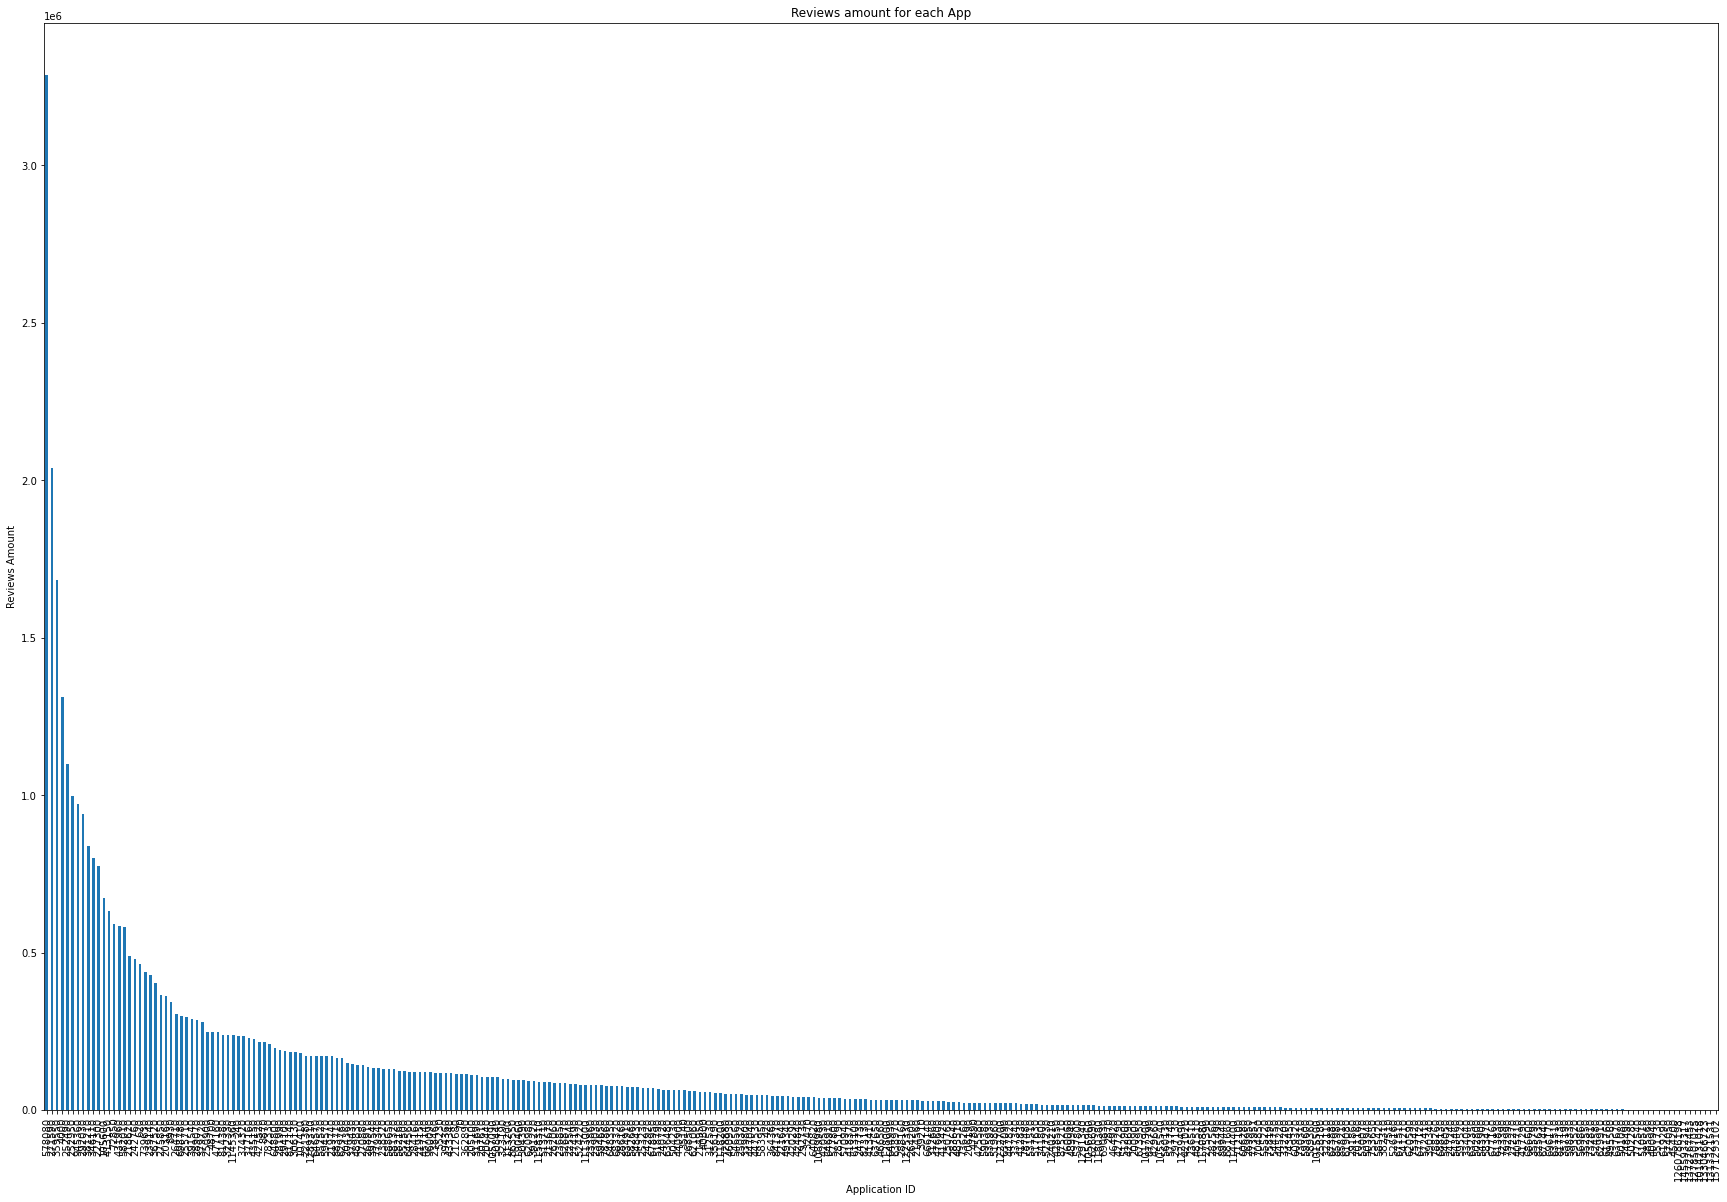

In [21]:
reviewsAmounts = dataframe['app_id'].value_counts()
ra_plot = reviewsAmounts.plot(kind='bar',
                                    figsize=(30,20),
                                    title="Reviews amount for each App")
ra_plot.set_xlabel("Application ID")
ra_plot.set_ylabel("Reviews Amount")
#plt.show()

### Find out are the most and least reviewed applications

In [22]:
print(reviewsAmounts.idxmax())
print(reviewsAmounts.idxmin())

578080
1260786198


### What applications have the best Weighted Vote Score?


In [23]:
# daframe.sort_values('weighted_vote_score')
scores = dataframe['weighted_vote_score']
max = scores.idxmax()

print(dataframe[dataframe['weighted_vote_score'] == dataframe['weighted_vote_score'].max()]['app_id'])


3984227    1014231018
Name: app_id, dtype: int64


### Which applications have the most and the least recommendations?


In [24]:
recommended = dataframe.groupby('app_id')['recommended'].apply(lambda r : (r == True).sum()).reset_index(name = 'recommendations')
max_min_recommendations = recommended[
        (recommended['recommendations'] == recommended['recommendations'].max()) |
        (recommended['recommendations'] == recommended['recommendations'].min())
      ]
print(max_min_recommendations)

         app_id  recommendations
196      578080          2530672
315  1014231018                1
316  1260786198                1
317  1278507025                1
318  1313321531                1
319  1330466723                1
320  1372767453                1
321  1455932317                1
322  1571293102                1


### How many of these applications were purchased, and how many were given for free?


In [25]:
print((dataframe)['received_for_free'].agg({'Given for free' : lambda x : (x == True).sum(), 'Purchased' : lambda y : (y == False).sum()}))

Given for free    17688069
Purchased         21059310
Name: received_for_free, dtype: int64


# [RQ3]  Now it's important to understand the preferred time to do reviews.
---


### What is the most common time that authors review an application? For example, authors usually write a review at 17:44.

In [26]:
timeframes = pd.to_datetime(dataframe['timestamp_created'].apply(lambda time : (datetime.fromtimestamp(time))))

In [27]:
modes = timeframes.dt.time.mode()
print("People usually write reviews at: ")
[print(time.strftime('%H:%M') ) for time in modes.values]

People usually write reviews at: 
16:54


[None]

### Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.


In [28]:
# Counting how many datetime occurences in input_timeframes belong to each interval in intervals
#
# Parameters :
# [intervals] : List of datetime tuples (interval_start, interval_end)
# such that they define time intervals. E.G. = (06:00, 12:00). [start] has to be lesser than [end]
# [input_timeframes] : input list of (DateTime objects)
#
# Returns : A Pandas dataframe with input_timeframes grouped by intervals.
#           E.G. : 
#           '    Interval   |   Reviews    '
#           ' --------------|--------------'
#           ' 06:00 - 09:59 |    100000    '
#           ' 10:00 - 11:59 |     30000    '
#           '------------------------------'
def count_reviews_in_belonging_t_interval(intervals, input_timeframes):

    df_timeframes = pd.DataFrame()
    df_timeframes['times'] = input_timeframes
    df_timeframes.index = pd.to_datetime(input_timeframes)
    output = pd.DataFrame({'Interval' : [], 'Reviews' : []})

    for (start,end) in intervals :
        assert(start < end), 'Input Mismatch: DateTime interval had start greater than end!'
        
        start = start.strftime('%H:%M')
        end = end.strftime('%H:%M')
        r_amount = len(df_timeframes.between_time(start, end))
        output = output.append(pd.DataFrame({'Interval' : ['{}-{}'.format(start,end)], 'Reviews': [r_amount]}), ignore_index = True)
    return output


### Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:

<AxesSubplot:xlabel='Interval'>

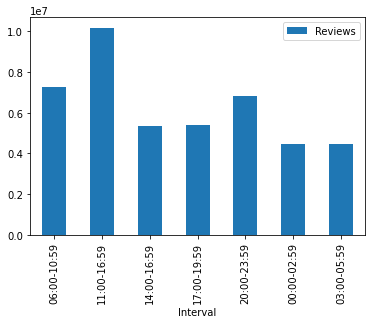

In [29]:
# Defining said intervals as datetime objects
intervals = [
    ( datetime.strptime('06:00:00', "%H:%M:%S"), datetime.strptime('10:59:59', "%H:%M:%S") ),
    ( datetime.strptime('11:00:00', "%H:%M:%S"), datetime.strptime('16:59:59', "%H:%M:%S") ),
    ( datetime.strptime('14:00:00', "%H:%M:%S"), datetime.strptime('16:59:59', "%H:%M:%S") ), 
    ( datetime.strptime('17:00:00', "%H:%M:%S"), datetime.strptime('19:59:59', "%H:%M:%S") ),
    ( datetime.strptime('20:00:00', "%H:%M:%S"), datetime.strptime('23:59:59', "%H:%M:%S") ),
    ( datetime.strptime('00:00:00', "%H:%M:%S"), datetime.strptime('02:59:59', "%H:%M:%S") ),
    ( datetime.strptime('03:00:00', "%H:%M:%S"), datetime.strptime('05:59:59', "%H:%M:%S") )
]

# Counnting how many reviews have been placed in said intervals
output = count_reviews_in_belonging_t_interval(intervals, timeframes)
output.plot(x = 'Interval', y='Reviews', kind='bar')

# [RQ4] As Steam is a worldwide platform, the reviews can be done in many languages. Let's extract some information about it.

### What are the top 3 languages used to review applications?

In [30]:
top_3_languages = dataframe['language'].value_counts()[:3].index.tolist()
print(top_3_languages)

['english', 'schinese', 'russian']


### Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.

In [31]:
def filter_dataset_on_languages(dataset, languages) :
    return dataset[dataset['language'].isin(languages)]


### Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?

In [32]:
filtered_ds = filter_dataset_on_languages(dataframe, top_3_languages)

In [33]:
print('{:.2f}%'.format(100 * (len(filtered_ds[filtered_ds['votes_funny'] > 0])) / len(filtered_ds)))

11.81%


### Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

In [34]:
print('{:.2f}%'.format(100 * (len(filtered_ds[filtered_ds['votes_helpful'] > 0])) / len(filtered_ds)))

28.13%


# [RQ5] The reviews' authors are users from the game that provide their opinion on it. Now you can check how often they make reviews.



### Plot the top 10 most popular reviewers and the number of reviews.

In [35]:
top_10_reviewers = dataframe[dataframe['author.steamid'].isin(dataframe['author.steamid'].value_counts()[:10].index.tolist())][['author.steamid','author.num_reviews']].drop_duplicates()

<AxesSubplot:xlabel='Reviewer'>

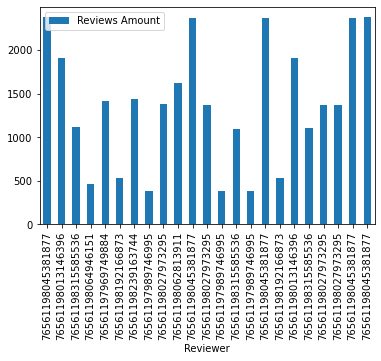

In [36]:
reviewers = pd.DataFrame({'Reviewer':top_10_reviewers['author.steamid'], 'Reviews Amount':top_10_reviewers['author.num_reviews']})
reviewers.plot(x = 'Reviewer', y = 'Reviews Amount', kind='bar')


### What applications did the most popular author review?

In [37]:
most_popular_author = dataframe['author.steamid'].mode()[0]
most_popular_author_reviews = dataframe[dataframe['author.steamid'] == most_popular_author]


In [38]:
print(most_popular_author_reviews[['app_id','app_name']])

          app_id                  app_name
512675        70                 Half-Life
539037       240    Counter-Strike: Source
658130       420  Half-Life 2: Episode Two
849477       620                  Portal 2
1549581     4000               Garry's Mod
...          ...                       ...
21578107  367520             Hollow Knight
21624890  447820             Day of Infamy
21651066  598330                SimAirport
21656340  543460             Dead Rising 4
21672218  355790  Styx: Shards of Darkness

[149 rows x 2 columns]


### How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.

In [39]:
games_received_for_free = most_popular_author_reviews[most_popular_author_reviews['received_for_free'] == True]
games_paid = most_popular_author_reviews[most_popular_author_reviews['received_for_free'] == False]

amount_paid = len(games_paid)
amount_free = len(games_received_for_free)
tot = amount_free + amount_paid

print("Most popular reviewer has : ")
print("{}/{} ({:.2f}%) games that have been purchased".format(amount_paid, tot, 100 * amount_paid / tot))
print("{}/{} ({:.2f}%) games that have been received for free".format(amount_free, tot, 100 * amount_free / tot))

Most popular reviewer has : 
145/149 (97.32%) games that have been purchased
4/149 (2.68%) games that have been received for free


### How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

In [53]:
print("Author {} has reviewed positively {} of the {} purchased.".format(most_popular_author, len(games_paid[games_paid['recommended'] == True]), amount_paid))
print("Author {} has reviewed negatively {} of the {} purchased.".format(most_popular_author, len(games_paid[games_paid['recommended'] == False]), amount_paid))
print("Author {} has reviewed positively {} of the {} received for free.".format(most_popular_author, len(games_received_for_free[games_received_for_free['recommended'] == True]), amount_free))
print("Author {} has reviewed negatively {} of the {} received for free.".format(most_popular_author, len(games_received_for_free[games_received_for_free['recommended'] == False]), amount_free))

Author 76561198062813911 has reviewed positively 142 of the 145 purchased.
Author 76561198062813911 has reviewed negatively 3 of the 145 purchased.
Author 76561198062813911 has reviewed positively 4 of the 4 received for free.
Author 76561198062813911 has reviewed negatively 0 of the 4 received for free.


# [RQ6] It's time to get information from the updates that a user does to his reviews.
---

### What is the average time (days and minutes) a user lets pass before he updates a review?

In [41]:
# Filtering out reviews that don't have updated timestamp
updated_reviews = dataframe[dataframe['timestamp_updated'].notnull()]
updated_reviews = updated_reviews[updated_reviews['timestamp_updated'] != updated_reviews['timestamp_created']]

In [42]:
time_between_updates = updated_reviews.apply(lambda row : (datetime.fromtimestamp(row['timestamp_updated']) - datetime.fromtimestamp(row['timestamp_created'])), axis=1)

In [43]:
average_time_between_updates = np.mean(time_between_updates)
print(average_time_between_updates)

183 days 23:10:19.433543902


### Plot the top 3 authors that usually update their reviews.

<AxesSubplot:title={'center':'Top 3 Review Updaters'}, xlabel='Reviewers', ylabel='Updates Amount'>

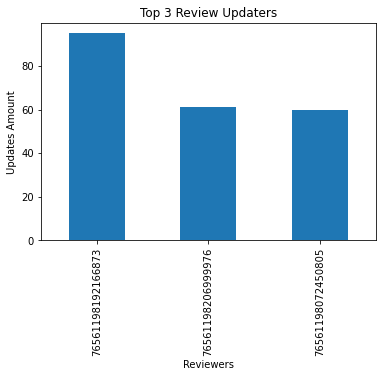

In [44]:
most_frequent_updaters = (updated_reviews['author.steamid'].value_counts()[:3])
most_frequent_updaters.plot(kind='bar', title ="Top 3 Review Updaters", xlabel="Reviewers", ylabel ="Updates Amount")

# [RQ7] Of course, calculating probabilities is a job that any Data Scientist must know. Let's compute Some interesting figures.
---


### What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?

In [45]:
well_voted_reviews = (dataframe[dataframe['weighted_vote_score'] >= 0.5] )

In [46]:
well_voted_review_probability = len(well_voted_reviews) / len(dataframe)
print('{:.2f}%'.format(100 * well_voted_review_probability))

21.75%


### What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

In [47]:
funny_and_well_voted_reviews = well_voted_reviews[well_voted_reviews['votes_funny'] > 0]

In [48]:
funny_and_well_voted_reviews_probability = (len(funny_and_well_voted_reviews) / len(well_voted_reviews))

In [49]:
print('{:.2f}%'.format(100 * funny_and_well_voted_reviews_probability))

19.04%


### Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

by definition probs are indipendent if the prob of their interception is equal to p(a) * p(b).. so...

In [50]:
funny_reviews = dataframe[dataframe['votes_funny'] > 0]
funny_well_voted_interception = (dataframe.query('votes_funny > 0 & weighted_vote_score >= 0.5'))

In [51]:
funny_reviews_probability = len(funny_reviews)/len(dataframe)

funny_times_well_voted_probability = funny_reviews_probability * well_voted_review_probability
funny_well_voted_interception_probability = len(funny_well_voted_interception)/len(dataframe)

In [52]:
print(funny_well_voted_interception_probability == funny_times_well_voted_probability)

False


# [RQ8] Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check if a hypothesis is correct or not.
---

### Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.


### Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.


### Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

### What are histograms, bar plots, scatterplots and pie charts used for?

### What insights can you extract from a Box Plot?

# Teoretical Questions 
---

# [TQ1]

We are given the following algorithm.
```
Input: 
    A: array of length n
    k: integers between 1 and n
    
function alg(A, k):
  s <-- a random element of A
  set L = [all the elements of A with value <= s]
  set R = [all the elements of A with value > s]
  r = len(L)
  if k == r:
    return s
  else if k < r:  
    return alg(L, k)
  else:
    return alg(R, k - r)
```
What does the algorithm compute?
What is asymptotically (i.e., we are asking for big-O complexity) the running time of the algorithm in the worst case, as a function of n?
What is asymptotically the running time of the algorithm in the best case?

# TQ1 answer

### What does the algorithm compute?
This algorithm performs a search on the input array returning the Kth element in ascending order.  

It works by dividing the array in two subset, one smaller and one bigger than a random element S.  
Since the array is not sorted and the algorithm does not include a sorting logic, we assume that each time it has to split the input, it's going to perform an amount of operations equal to the length of the input itself O(n). 

After having divided the input in two separated lists, if the element has not ben found (the randomly chosen element would be at the end of the first subset, therefore its index is equal to len(L), it checks whether or not the value belongs to the smaller-than or bigger-than subset and recursively calls itself on the correct subset. 

The algorithm ends either when the element we're looking for gets randomly selected, or when it's left with a subset of two elements which gets split in two atomic lists. In this case, it either returns the first one if its correct, or calls itself for the last time. 


### What is asymptotically the running time ?
- **Worst case** <br/>In the worst case scenario, in which the element that we're looking for is on one extreme and the randomly selected element is always in the other extreme of an unsorted array, the algorithm is going to compute in :<br /> *O(n^2)*, because it's going to sort n elements n amount of times. (Removing only one element from the array in every step.)
- **Best case** <br/>In the best case scenario the first randomly selected element equals the correct one, so the computational time is equal to 2n + len(r), therefore **O(n)**; where n is the length of the array.<br/>This is true because before checking if the element is correct, the algorithm has to split the input in two parts.<br/>
- **Normal case** <br/> Normally, the algorithm is going to have a logarithmic complexity of n(log(n)), because it will have to sort n elements a log(n) amount of times (the selection of the subset division is random)

# TQ2
You are given the recursive function splitSwap, which accepts an array a, an index i, and a length n.
```
function splitSwap(a, l, n):
  if n <= 1:
    return
  splitSwap(a, l, n/2)
  splitSwap(a, l+ n /2, n/2)
  swapList(a, l, n)
The subroutine swapList is described here:

function swapList(a, l, n):
  for i = 0 to n/2:
    tmp = a[l + i]
    a[l + i] = a[l + n/2 + i]
    a[l + n/2 + i] = tmp
 ```
How much running time does it take to execute splitSwap(a, 0, n)? (We want a Big O analysis.)
What does this algorithm do? Is it optimal? Describe the mechanism of the algorithm in details, we do not want to know only its final result.
HINT: Consider the scenario where len(a) and n are numbers that are a power of 2.

---

# TQ2 answer
### How much running time does it take to execute?
The algorithm takes asintotically **n log(n)** running time to execute.  
This is given by the fact that the function swapList has linear complexity O(n) : its running time is (n/2)\*(3).   
Swaplist is then called asyntotically log(n) amount of times, since for each step splitSwap is called by reducing n in half. 

Matematically the running time is :    
SwapList : (n/2)\*(3) = O(n)   
SplitSwap : log(n) \* (n/2)\*3 => O(n(log(n))

### How does it work?
This algorithm is designed to *split* **a** (the input) starting from index *L* and to swap every item after its *Lth*.  

The algorithm implements a recursive function that modifies the input by enqueueing operations in a tree-like structure, with depth equal to :    
**2^d = N**.   
Where d is the *depth*

Visually:    
<img src="https://user-images.githubusercontent.com/50860347/139086690-4bf9b177-1231-4a08-aa1e-adde8215eaa6.jpg" alt="Tree structure" width="400"/>

The tree is visited in a **Post-Order LRN** way : left subtree first, then right-subtree, and at the end the node.   
In this case the tree is visited in this order:
1. [**splitSwap(a, 3, 1)**]
2. [**splitSwap(a, 4, 1)**]
3. [**splitSwap(a, 3, 2)**]
4. [**splitSwap(a, 5, 1)**]
5. [**splitSwap(a, 6, 1)**]
6. [**splitSwap(a, 5, 2)**]
7. [**splitSwap(a, 3, 4)**]

This is how it works:   
When n = 2 (Depth d-1), the element in position L is pushed to end of the list. (this happens after all the leafs of that depth are computed)   
when n > 2, the elements are swapped with the element in position equal to their position + n/2    

in the end, the value returned is an array with values that are equal to the input until position L, and then the starting values swapped with themself according to the logic explained above.


Speaking of complexity analysis, I would say that the algorithm is optimal,  because asinothothically its complexity is O(nlog(n)).
On the other hand, I would also say that the algorithm is not optimal at all because it has many flaws in its design:    
*Considering the scenario where len(a) and n are numbers that are a power of 2*   
In order to work without throwing errors the algorithm requires some **constraints** to be respected: In particular, N has to be smaller than len(a)/2 and l+N has to be smaller than len(a).   
This is required to avoid **Index Out Of Bound Exceptions**   
In conclusion, I think that the algorithm would be optimal if its flawes were fixed.  

# git is **kinda** fun